# Multinomial sampling of simulated population

Analyzing the influence of the sampling method on various analyses.

In [1]:
import numpy as np
import pandas as pd

import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ThesisScripts.MyModel import Population, Clone
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Reference simulations

In [2]:
# set seed to get same result for each test simulation
np.random.seed(123)

l = 10**8
q = 10**(-3)
neutral = Population(l, q, mutfactor=1, death_frac=0.3, selection=0)
neutral.simulate()
print("Total population size:", neutral.size)
print("Generations:", neutral.gen)
print()
print("Start clone size:", neutral.start_clone.size)
print("Total number of mutations:", sum(neutral.mut_vec))
print("Number of subclones:", len(neutral.clones[1:]))
print("Total size of subclones:", sum([x.size for x in neutral.clones[1:]]))
print("Dead clones:", len([x for x in neutral.clones if x.size == 0]))
print()

Total population size: 116402657
Generations: 35

Start clone size: 114956110
Total number of mutations: 166236
Number of subclones: 166236
Total size of subclones: 1446547
Dead clones: 14208



In [3]:
# set seed to get same result for each test simulation
np.random.seed(123)

l = 10**8
q = 10**(-3)
selection = Population(l, q, mutfactor=1, death_frac=0.3, selection=0.3)
selection.simulate()
print("Total population size:", selection.size)
print("Generations:", selection.gen)
print()
print("Start clone size:", selection.start_clone.size)
print("Total number of mutations:", sum(selection.mut_vec))
print("Number of subclones:", len(selection.clones[1:]))
print("Total size of subclones:", sum([x.size for x in selection.clones[1:]]))
print("Dead clones:", len([x for x in selection.clones if x.size == 0]))
print()

Total population size: 116402657
Generations: 35

Start clone size: 2159346
Total number of mutations: 165726
Number of subclones: 165726
Total size of subclones: 114243311
Dead clones: 16270



In [4]:
neutral_data = final_data(neutral)
selection_data = final_data(selection)

In [5]:
sampled_neutral_data_0p1 = sample(neutral_data, 10**5, det_lim=100)
sampled_neutral_data_1 = sample(neutral_data, 10**6, det_lim=100)
sampled_neutral_data_10 = sample(neutral_data, 10**7, det_lim=100)

In [6]:
sampled_selection_data_0p1 = sample(selection_data, 10**5, det_lim=100)
sampled_selection_data_1 = sample(selection_data, 10**6, det_lim=100)
sampled_selection_data_10 = sample(selection_data, 10**7, det_lim=100)

## Comparative analyses

### Allele frequencies

#### NEUTRAL

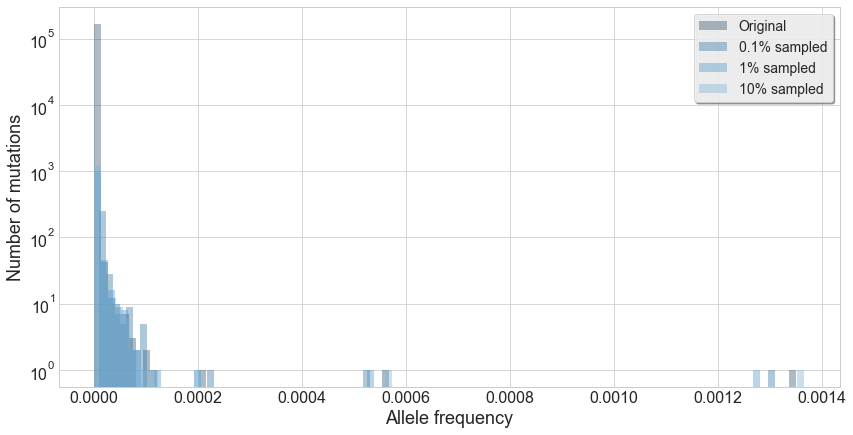

In [7]:
with sns.color_palette("Blues_d", 4):
    sns.distplot(neutral_data.iloc[1:]["Allele frequency"], kde=False, bins=100, label="Original");
    sns.distplot(sampled_neutral_data_0p1.iloc[1:]["sampled_AF"], kde=False, bins=100, label="0.1% sampled");
    sns.distplot(sampled_neutral_data_1.iloc[1:]["sampled_AF"], kde=False, bins=100, label="1% sampled");
    sns.distplot(sampled_neutral_data_10.iloc[1:]["sampled_AF"], kde=False, bins=100, label="10% sampled")
    plt.yscale('log');
    plt.legend(frameon=True, fancybox=True, shadow=True);
    plt.xlabel('Allele frequency');
    plt.ylabel('Number of mutations');
    plt.savefig('./Figures/Sampling_method-figures/SAMPLING-Neutral_AFs.png', bbox_inches='tight')
    plt.show()

#### SELECTION

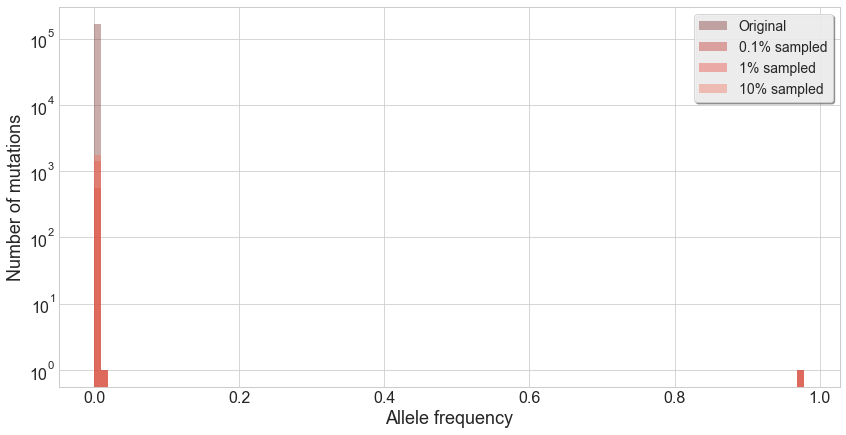

In [8]:
with sns.color_palette("Reds_d", 4):
    sns.distplot(selection_data.iloc[1:]["Allele frequency"], kde=False, bins=100, label="Original");
    sns.distplot(sampled_selection_data_0p1.iloc[1:]["sampled_AF"], kde=False, bins=100, label="0.1% sampled");
    sns.distplot(sampled_selection_data_1.iloc[1:]["sampled_AF"], kde=False, bins=100, label="1% sampled");
    sns.distplot(sampled_selection_data_10.iloc[1:]["sampled_AF"], kde=False, bins=100, label="10% sampled")
    plt.yscale('log');
    plt.legend(frameon=True, fancybox=True, shadow=True);
    plt.xlabel('Allele frequency');
    plt.ylabel('Number of mutations');
    plt.savefig('./Figures/Sampling_method-figures/SAMPLING-Selection_AFs.png', bbox_inches='tight')
    plt.show()

### Heterogeneity

In [9]:
neut = [neutral_data, sampled_neutral_data_0p1, sampled_neutral_data_1, sampled_neutral_data_10]
sel = [selection_data, sampled_selection_data_0p1, sampled_selection_data_1, sampled_selection_data_10]

In [10]:
neut_H = [heterogeneity(neutral_data, sampled=False, det_lim=100)]
sel_H = [heterogeneity(selection_data, sampled=False, det_lim=100)]

for n, s in zip(neut[1:], sel[1:]):
    neut_H.append(heterogeneity(n, sampled=True))
    sel_H.append(heterogeneity(s, sampled=True))

In [11]:
labels=["Original", "0.1% sampled", "1% sampled", "10% sampled"]

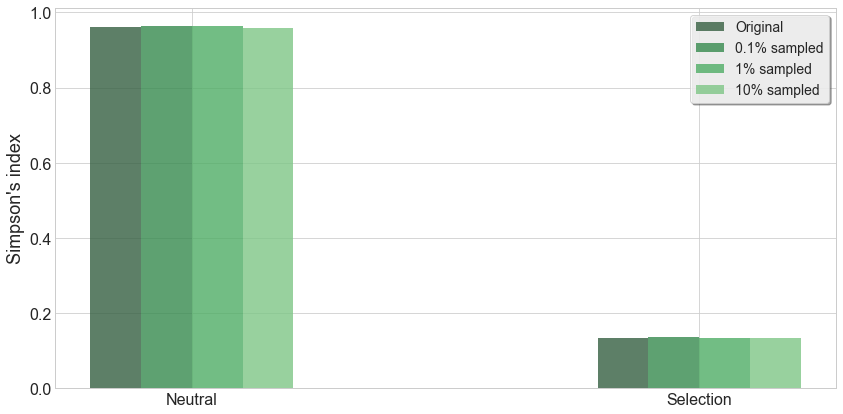

In [12]:
with sns.color_palette("Greens_d", 4):
    offset = -0.15
    for lab, nh in zip(labels, neut_H):
        plt.bar(left=0+offset, height=nh, width=0.1, alpha=0.8, label=lab);
        offset += 0.1
        
    offset = -0.15
    for lab, sh in zip(labels, sel_H):
        plt.bar(left=1+offset, height=sh, width=0.1, alpha=0.8);
        offset += 0.1

plt.xticks([0, 1], ["Neutral", "Selection"]);
plt.ylabel("Simpson's index");
plt.legend(frameon=True, fancybox=True, shadow=True);
plt.savefig('./Figures/Sampling_method-figures/SAMPLING-Heterogeneity.png', bbox_inches='tight')
plt.show()